# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

In [34]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import recall_score


df=pd.read_csv('diabetes.csv')

In [72]:
print(df.isnull().sum())    
## no nulls but later we will discover they are likely replaced with the value Zero

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
print(  df.duplicated().sum())
## no duplicates

0


In [50]:
df.describe(include='all')
## Stats for everyone
## One of our questions was avg age, we can see it is 33.2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
diabetes_yes = df['Outcome'] == 1  ## boolean mask filter for those with diabetes
df[diabetes_yes].describe(include='all')

## Stats for those WITH Diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [66]:
diabetes_no = df['Outcome'] == 0  ## boolean mask filter for those without diabetes
df[diabetes_no].describe(include='all')

## Stats for those WITHOUT diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


Next I will look at the distribution of all the predictor variables

Text(0.5, 1.0, 'Distribution of Pregnancies')

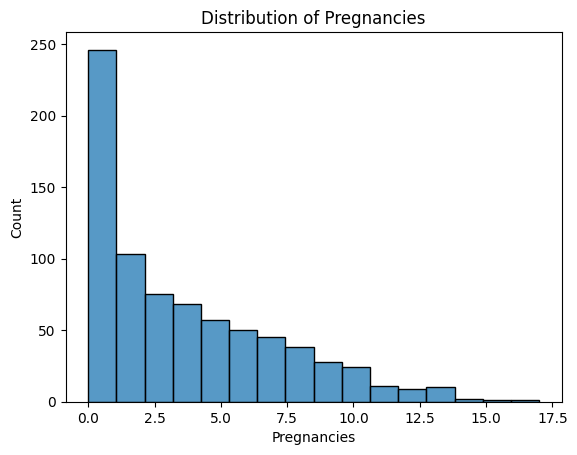

In [2]:
sns.histplot(df['Pregnancies'])
plt.title('Distribution of Pregnancies')

Text(0.5, 1.0, 'Distribution of Glucose')

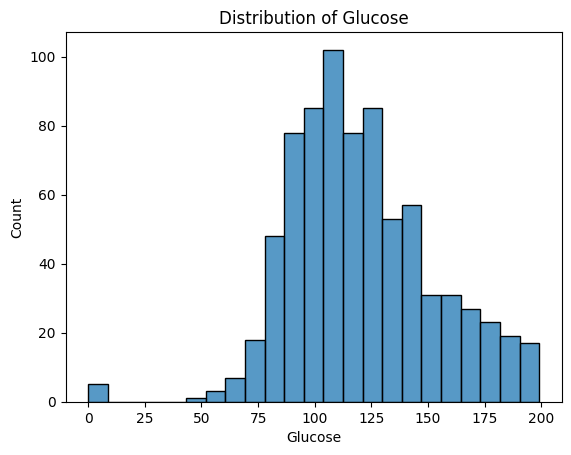

In [3]:
sns.histplot(df['Glucose'])
plt.title('Distribution of Glucose')
## A few zeros we need to get rid of
## This dataset likely used 0 for missing data instead of NaN

Text(0.5, 1.0, 'Distribution of Skin Thickness')

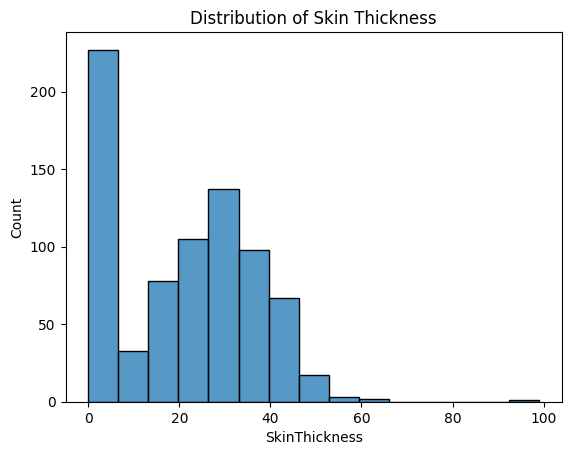

In [4]:
sns.histplot(df['SkinThickness'])
plt.title('Distribution of Skin Thickness')
## about 1/3 are zero/NA 
## the 99 is probably a mistake also

Text(0.5, 1.0, 'Distribution of Insulin')

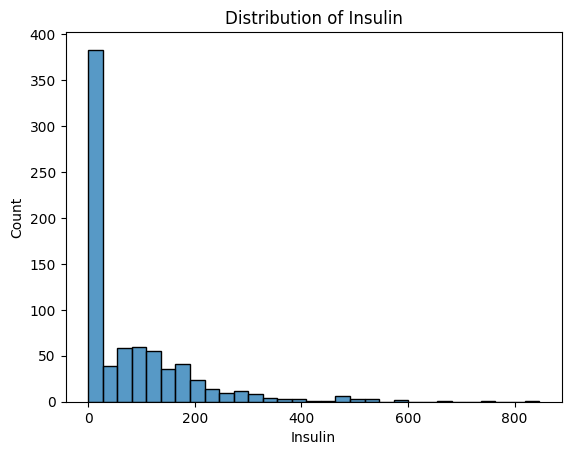

In [5]:
sns.histplot(df['Insulin'])
plt.title('Distribution of Insulin')
## almost half of these values are zero/NA so we may have to drop the column

Text(0.5, 1.0, 'Distribution of BMI')

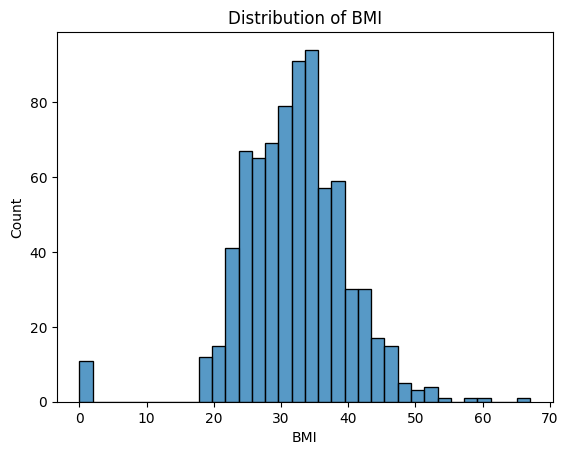

In [6]:
sns.histplot(df['BMI'])
plt.title('Distribution of BMI')
## A few zero/NA to remove

Text(0.5, 1.0, 'Distribution of DiabetesPedigreeFunction')

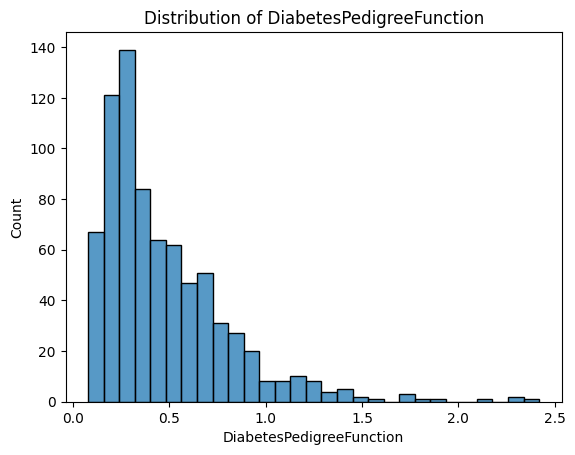

In [7]:
sns.histplot(df['DiabetesPedigreeFunction'])
plt.title('Distribution of DiabetesPedigreeFunction')
## Im not sure what this variable means but the distribution looks fine

Text(0.5, 1.0, 'Distribution of Age')

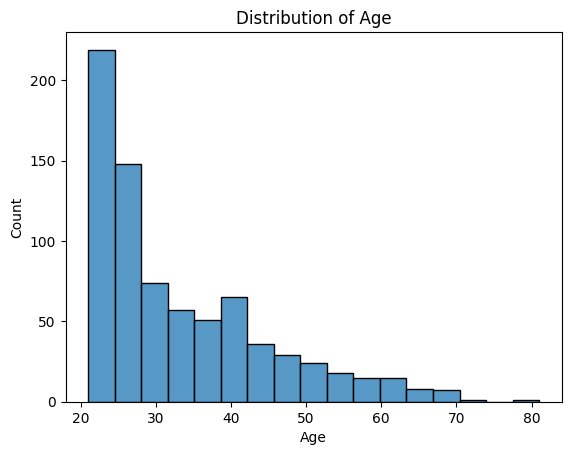

In [8]:
sns.histplot(df['Age'])
plt.title('Distribution of Age')

## Looks good

Checking Relationships between predictors

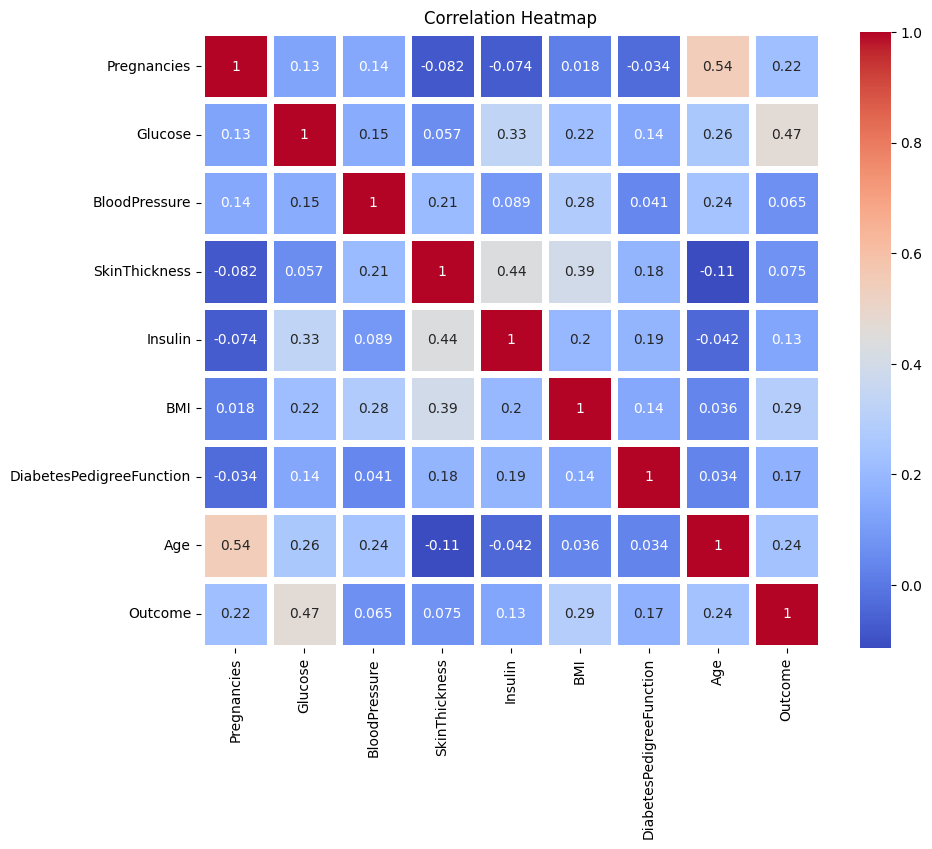

In [59]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', linewidths=5)
plt.title("Correlation Heatmap")
plt.show()
## There does not appear to be any significant relationship between the predictors

<h3>Summary<h3>

- There is alot of missing data but it was recorded as zeroes rather than nulls, we will have to fix this in the next section
- The predictors all have higher means for people with diabetes, indicating a probable positive correlation
- The predictors all have normal distributions when you ignore the zeroes
- There are some outliers that we must remove in the next section
- There doesnt appear to be correlation between the predictors
- The average age of the data is 33.2
- The avg glucose for people WITTH diabetes is 141 and 109 for those WITHOUT
- The avg BMI for people WITH diabetes is 35.1 and  30.3   for those WITHOUT
- We have no male and female data available



# Part II : Preprocessing & Feature Engineering

Handling Missing Values - We can See from the histograms above that Zeros were likely used instead of Nulls so we have to remove them

In [9]:
cleandf=df.copy()  ## making a new df to work with
cleandf.replace(0, np.nan, inplace=True)
cleandf['Outcome'] = cleandf['Outcome'].replace( np.nan  ,0)  ## We want to keep the zeros in the outcome column so we change it back

cleandf.isnull().sum()  ## now that we changed the zeroes to null, we can check how many there are

## zero pregnancies are ok
## The Insulin is almost half nulls and must be dropped
## For the rest of the columns we can just remove the rows with nulls

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
cleandf = cleandf.drop('Insulin', axis=1)
cleandf.dropna(inplace=True)
cleandf.describe(include='all')

## Drops the insulin column (because it is half nulls) and removes other rows with missing data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,4.112088,120.118681,71.083516,28.789011,32.258462,0.499675,32.617582,0.329670
std,3.221378,30.986340,12.198869,10.375308,6.314420,0.328464,10.973281,0.470611
min,1.000000,56.000000,24.000000,7.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,21.000000,27.700000,0.259500,24.000000,0.000000
50%,3.000000,113.000000,72.000000,29.000000,32.400000,0.415000,29.000000,0.000000
75%,6.000000,142.000000,78.000000,36.000000,36.100000,0.660500,40.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,57.300000,2.329000,81.000000,1.000000


Outliers

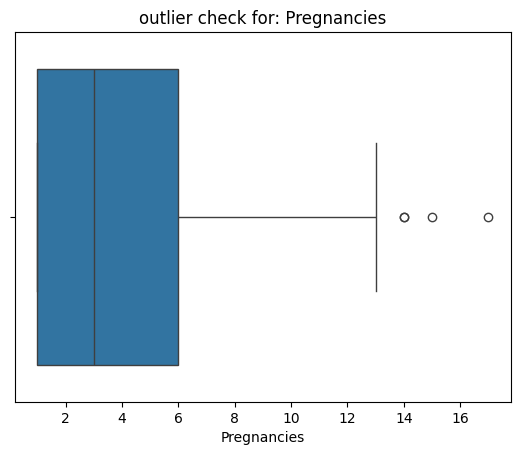

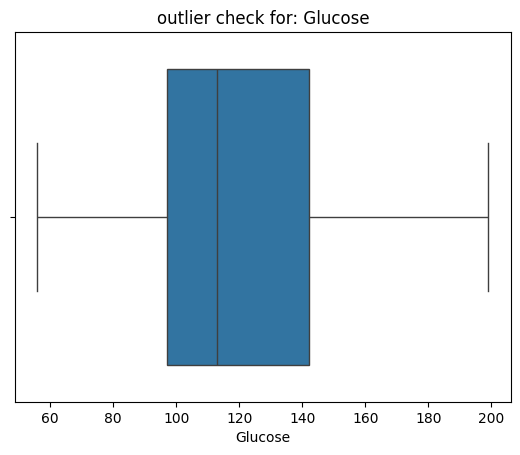

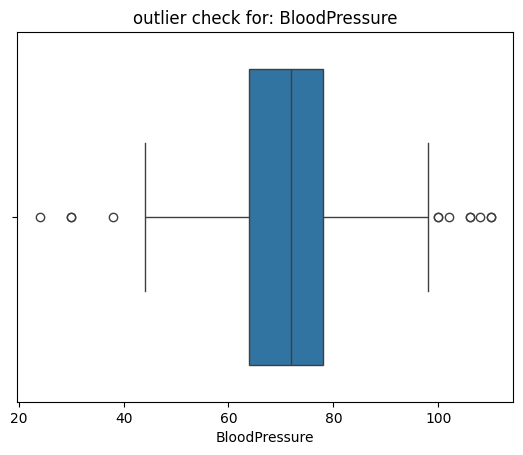

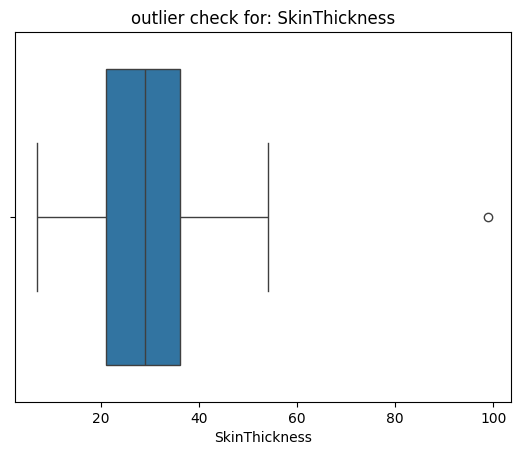

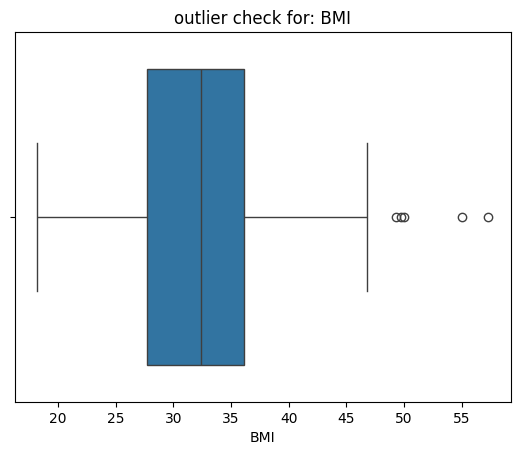

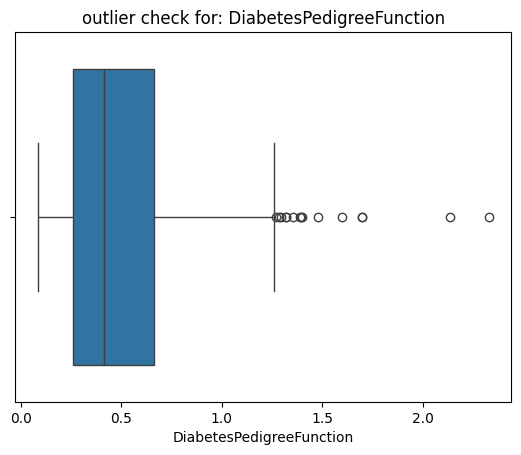

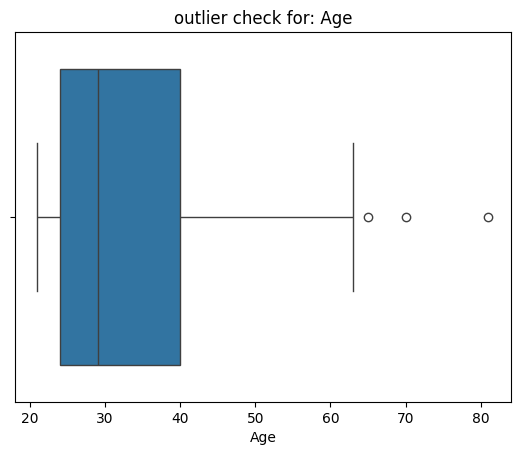

In [13]:
for column in cleandf.columns[:-1]:
    plt.figure()
    plt.title('outlier check for: ' + column)
    sns.boxplot(x = column, data = cleandf)


## Plots histograms of the predictor variables to show any outliers that need removing
## we can see quite a few that need removing
   

In [14]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1  ## gets quartiles and IQR
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)  ## setting the limits of allowable datapoints, 1.5*IQR is standard
    filter = (df >= lower_bound) & (df <= upper_bound)
    return df[filter]

cleandf2 = cleandf.iloc[:, :-1].apply(remove_outliers, axis=0)  ## Creates our new cleandf2 by applying the function to all columns except Outcome
cleandf2 = pd.concat([cleandf2, cleandf.iloc[:, -1]], axis=1)  ## Rejoins our cleandf2 with the Outcome column

## we will use cleandf2 from now on

In [15]:
cleandf2.dropna(inplace=True)  ## the previous function left a more Nulls that we need to drop


Split into Train and Test

In [18]:
X = cleandf2.drop('Outcome', axis=1)
y = cleandf2['Outcome']
## seperates the target and predictor variables


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
## splits the data into 80% for training and 20% for testing


Standardization of the data

In [20]:
## Because the X variables are all in different scales we have to standardize them before modeling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  ## we dont fit the test data to avoid data leakage

## we dont need to scale the Y values because that is the target

# Part III : Training ML Model

We will start with a basic Logistic Regression model.  Since this is a medical problem, where we are diagnosing a disease, the recall score is likely to be the most important.  Maximizing the recall score will ensure the least amount of diabetes gos undetected in patients, so we will pay the most attention to that metric.

In [43]:
basemodel=LogisticRegression()
basemodel.fit(X_train_scaled,y_train)  ## starting with a baseline logistic regression model
y_pred=basemodel.predict(X_test_scaled)

In [44]:
## Get roc_auc score


roc_auc = roc_auc_score(y_test, y_pred)



print(roc_auc)


0.7461016949152542


In [45]:
## get f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


F1 Score: 0.6511627906976745


In [40]:
## get accuracy score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8214285714285714


In [46]:
## recall score
recall = recall_score(y_test, y_pred)

print("Recall Score:", recall)


Recall Score: 0.56


<h3>Base Model Results:</h3>   
- Accuracy: 0.82     <br>
- roc_auc_score: 0.74      <br>
- F1 score: 0.65 <br>
- recall score: 0.56

Now we will try a random forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=25)  

rfc.fit(X_train_scaled, y_train)

y_rfc_pred=rfc.predict(X_test_scaled)

In [53]:
## get accuracy score
rfcaccuracy = accuracy_score (y_test,y_rfc_pred)
print(rfcaccuracy)

0.7619047619047619


In [54]:
## get roc_auc score
rfc_roc_auc = roc_auc_score(y_test, y_rfc_pred)
print(rfc_roc_auc)

0.7267796610169492


In [55]:
## get f1 score
rfc_f1 = f1_score(y_test, y_rfc_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.6511627906976745


In [56]:

# Calculate the recall score
recall = recall_score(y_test, y_rfc_pred)

print("Recall Score:", recall)

Recall Score: 0.64


<h3>Random Forest Results:</h3>   
- Accuracy: 0.76     <br>
- roc_auc_score: 0.72     <br>
- F1 score: 0.65 <br>
- Recall Score: 0.64 <br>

This model performs about the same as the baseline , lets see if dropping the least important feature can improve it

In [211]:
feature_scores=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

## we can see the bloodpressure is the least important feature, so lets try the model without using that

Glucose                     0.259502
Age                         0.177135
DiabetesPedigreeFunction    0.143747
BMI                         0.122474
Pregnancies                 0.115564
SkinThickness               0.092977
BloodPressure               0.088601
dtype: float64

Dropping the least important feature

In [214]:
X = cleandf2.drop(['Outcome', 'BloodPressure'] ,axis=1)
y = cleandf2['Outcome']
## taking out the target and the  least important variable


In [215]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_scaled = scaler.fit_transform(X_train)   ## same as above
X_test_scaled = scaler.transform(X_test)


In [217]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train_scaled, y_train)

y_rfc_pred=rfc.predict(X_test_scaled)

rfcaccuracy = accuracy_score (y_test,y_rfc_pred)
print(rfcaccuracy)

## Dropping the least important feature resulted in lower accuracy so we will not drop it

0.7023809523809523


Manually dropping the least important feature didnt work, now lets try tuning the hyperparameters with GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()


## This is a list of the various hyperparameters, gridsearch will try them all to find the best performing combination
param_grid = {
    'n_estimators': [10,20,50,100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],

}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='recall')


grid.fit(X_train_scaled,y_train)


In [32]:
## This will print out the best combination of hyperparameters below
best_params = grid.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid.best_estimator_

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}


In [60]:
y_pred_cv = best_model.predict(X_test_scaled)  ## uses our new tuned model to predict the test Y values

# Calculates the score for the same 4 metrics we used earlier.
recall = recall_score(y_test, y_pred_cv)
accuracy=accuracy_score(y_test,y_pred_cv)
roc_auc=roc_auc_score(y_test,y_pred_cv)
f1=f1_score(y_test,y_pred_cv)

print("Recall Score:", recall)
print("Accuracy ScoreL ", accuracy)
print('roc_auc score: ', roc_auc)
print('F1 Score: ',  f1)

Recall Score: 0.68
Accuracy ScoreL  0.8333333333333334
roc_auc score:  0.7891525423728815
F1 Score:  0.7083333333333334


After using gridsearch, the new model with the optimally tuned parameters has a higher score in every category than the first two models.  The .68 recall score is the best one yet and we should use this If we are trying to predict diabetes cases while having as few false negatives as possible

## Conclusion

####  - Glucose is the most important feature for predicting diabetes, and blood pressure is the least important
#### -  The mean of people with diabetes is higher in every predictor column than those without
####  - We should recommend the data be collected better so there arent so many missing values
#### - All features are important when predicting if the patient has  diabetes or not
#### - Recall score is likely the best metric when evaluating the models because it is important not to have false negatives when diagnosing diseases
#### - The GridSearch model was able to get a recall score of 0.68, better than the 0.65 from the LogisticRegression and 0.64 from the RandomForest
